# Directionality analysis

## Create CombObj with motifs

In [1]:
import tfcomb.objects
C = tfcomb.objects.CombObj(verbosity=0)

In [2]:
C.TFBS_from_motifs(regions = "../data/GM12878_enhancers_chr1.bed", 
                   motifs = "../data/HOCOMOCOv11_HUMAN_motifs.txt",
                   genome = "../data/hg38_chr1.fa.gz", 
                   threads = 4)

In [3]:
C.count_within(directional=True, stranded=True)
C.market_basket()

In [4]:
C.rules

,TF1,TF2,TF1_TF2_count,TF1_count,TF2_count,n_baskets,TF1_TF2_support,TF1_support,TF2_support,confidence,lift,cosine
0,ZNF121(-),PAX5(-),491,553,547,180898,0.002714,0.003057,0.003024,0.887884,293.631606,0.892741
1,PAX5(+),ZNF121(+),468,508,560,180898,0.002587,0.002808,0.003096,0.921260,297.596541,0.877445
2,SP1(-),SP2(-),420,480,562,180898,0.002322,0.002653,0.003107,0.875000,281.647242,0.808650
3,MEF2B(+),MEF2A(+),393,491,499,180898,0.002172,0.002714,0.002758,0.800407,290.164500,0.793965
4,SP1(-),SP3(-),380,480,491,180898,0.002101,0.002653,0.002714,0.791667,291.671928,0.782748
...,...,...,...,...,...,...,...,...,...,...,...,...
559539,FOXJ2(+),WT1(+),1,432,597,180898,0.000006,0.002388,0.003300,0.002315,0.701416,0.001969
559540,FOXA1(-),ZNF770(-),1,252,1058,180898,0.000006,0.001393,0.005849,0.003968,0.678496,0.001937
559541,KLF6(+),MEF2A(+),1,540,499,180898,0.000006,0.002985,0.002758,0.001852,0.671335,0.001926
559542,PAX5(-),BCL11A(+),1,547,595,180898,0.000006,0.003024,0.003289,0.001828,0.555814,0.001753


## Analyze preferential directionality of motifs

First, we create a directionality analysis for the rules found:

In [5]:
df = tfcomb.analysis.directionality(C.rules)

In [6]:
df.head(10)

,TF1,TF2,TF1_TF2_count,scenario1_TF1_TF2,scenario2_TF2_TF1,scenario3_convergent,scenario4_divergent,pvalue
12456,ZNF770,ZNF121,1726,0.589803,0.378331,0.018540,0.013326,0.000000e+00
6367,ZNF770,PAX5,1683,0.598336,0.355318,0.021390,0.024955,0.000000e+00
11772,ZNF121,PAX5,1067,0.059981,0.898782,0.022493,0.018744,0.000000e+00
69121,MEF2B,MEF2A,860,0.843023,0.068605,0.048837,0.039535,0.000000e+00
11562,MEF2C,MEF2B,800,0.067500,0.855000,0.041250,0.036250,0.000000e+00
61350,ZNF467,MAZ,1939,0.310469,0.551315,0.077359,0.060856,8.547741e-269
68797,ZFP28,STAT2,1196,0.051839,0.066054,0.219900,0.662207,1.093462e-252
77434,ZFP28,IRF3,1265,0.043478,0.065613,0.259289,0.631621,1.244702e-243
63461,ZFP28,IRF1,1224,0.045752,0.062908,0.265523,0.625817,2.733603e-231
46110,IRF1,STAT2,1481,0.480081,0.443619,0.045915,0.030385,2.972049e-231


We can subset these on pvalue and number of sites

In [7]:
selected = df[(df["pvalue"] < 0.01) & (df["TF1_TF2_count"] > 50)]

In [8]:
#Number of TF pairs with significant differences in directionality
selected.shape[0]

11357

## Visualize different preferences for directionality

In [9]:
import seaborn as sns

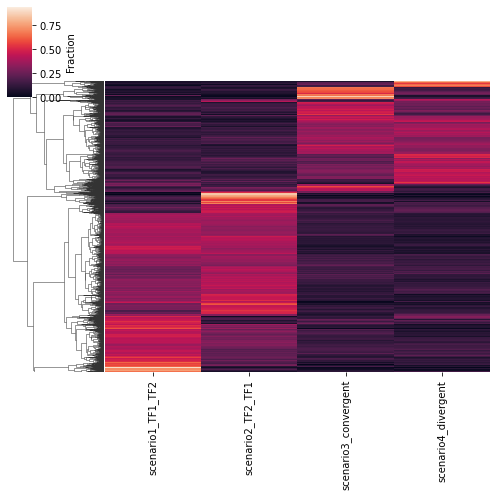

In [10]:
g = sns.clustermap(selected[["scenario1_TF1_TF2", "scenario2_TF2_TF1", "scenario3_convergent", "scenario4_divergent"]],
                        col_cluster=False,
                        yticklabels=False,
                        cbar_kws={'label': "Fraction"},
                        figsize=(7,7))

### TFs specific in TF1-TF2 orientation

In [11]:
selected.sort_values(["scenario1_TF1_TF2", "TF1_TF2_count"], ascending=False).head(10)

,TF1,TF2,TF1_TF2_count,scenario1_TF1_TF2,scenario2_TF2_TF1,scenario3_convergent,scenario4_divergent,pvalue
63860,RXRB,GRHL2,100,0.930000,0.020000,0.030000,0.020000,3.487599e-53
2345,ESRRG,RXRB,136,0.911765,0.022059,0.022059,0.044118,1.380037e-68
59388,TCF7L1,TCF7L2,291,0.907216,0.051546,0.027491,0.013746,3.663972e-145
39561,NR1I2,GRHL2,88,0.897727,0.068182,0.011364,0.022727,1.430557e-42
14126,NR5A1,ESRRA,156,0.897436,0.057692,0.019231,0.025641,2.133696e-75
68225,THRA,RXRB,175,0.897143,0.057143,0.017143,0.028571,1.559816e-84
21617,FOXA3,FOXA2,311,0.893891,0.041801,0.028939,0.035370,9.379289e-149
48625,NR2F2,GRHL2,112,0.892857,0.044643,0.035714,0.026786,3.020758e-53
70280,HNF4A,RXRG,62,0.887097,0.064516,0.016129,0.032258,5.750615e-29
9098,RARA,NR2F2,254,0.885827,0.043307,0.031496,0.039370,2.155067e-118


### TFs specific in TF2-TF2 orientation

In [12]:
selected.sort_values(["scenario2_TF2_TF1", "TF1_TF2_count"], ascending=False).head(10)

,TF1,TF2,TF1_TF2_count,scenario1_TF1_TF2,scenario2_TF2_TF1,scenario3_convergent,scenario4_divergent,pvalue
59255,RXRB,NR1I2,130,0.038462,0.938462,0.000000,0.023077,5.212897e-71
40844,NFKB2,GRHL2,73,0.027397,0.931507,0.041096,0.000000,5.149421e-39
76023,GRHL2,THRA,117,0.059829,0.923077,0.017094,0.000000,3.555722e-61
72227,RXRB,NR1H3,120,0.050000,0.916667,0.008333,0.025000,1.873988e-61
42227,RXRB,ATF2,68,0.058824,0.911765,0.029412,0.000000,2.602933e-34
69030,RORA,RORC,96,0.041667,0.906250,0.010417,0.041667,1.382264e-47
73337,TP63,TP73,177,0.056497,0.903955,0.022599,0.016949,2.521256e-87
67014,NR4A2,ESRRB,139,0.028777,0.899281,0.035971,0.035971,1.921634e-67
11772,ZNF121,PAX5,1067,0.059981,0.898782,0.022493,0.018744,0.000000e+00
34,CEBPE,CEBPA,58,0.034483,0.896552,0.017241,0.051724,7.111630e-28


### TFs specific in convergent orientation

In [13]:
selected.sort_values(["scenario3_convergent", "TF1_TF2_count"], ascending=False).head(10)

,TF1,TF2,TF1_TF2_count,scenario1_TF1_TF2,scenario2_TF2_TF1,scenario3_convergent,scenario4_divergent,pvalue
74482,NFE2,NFE2L2,195,0.020513,0.020513,0.943590,0.015385,4.061206e-108
36315,YY1,ZFP42,133,0.037594,0.015038,0.939850,0.007519,6.446909e-73
29009,CTCFL,NKX2-1,83,0.060241,0.036145,0.879518,0.024096,7.667838e-38
49686,NFKB2,MEF2D,131,0.038168,0.015267,0.870229,0.076336,3.472670e-58
54730,SRY,ZNF121,430,0.011628,0.039535,0.869767,0.079070,1.713505e-191
70755,PAX5,SRY,431,0.044084,0.020882,0.867749,0.067285,3.082609e-190
57889,MEF2D,RXRB,155,0.051613,0.012903,0.858065,0.077419,3.098080e-66
74651,GRHL2,MEF2D,118,0.042373,0.025424,0.855932,0.076271,5.947701e-50
4660,PAX5,MEF2D,371,0.043127,0.026954,0.854447,0.075472,9.107662e-157
1878,NFKB2,SRY,139,0.035971,0.028777,0.848921,0.086331,1.365800e-57


### TFs specific in divergent orientation

In [14]:
selected.sort_values(["scenario4_divergent", "TF1_TF2_count"], ascending=False).head(10)

,TF1,TF2,TF1_TF2_count,scenario1_TF1_TF2,scenario2_TF2_TF1,scenario3_convergent,scenario4_divergent,pvalue
5911,ESRRG,MITF,65,0.030769,0.030769,0.061538,0.876923,2.240251e-29
69367,MAF,ESRRG,100,0.030000,0.020000,0.080000,0.870000,2.307871e-44
30791,MEF2D,OSR2,208,0.043269,0.057692,0.033654,0.865385,8.664940e-91
49368,PAX5,CEBPB,52,0.038462,0.000000,0.096154,0.865385,7.962072e-23
10145,IKZF1,MAF,266,0.041353,0.052632,0.041353,0.864662,7.246241e-116
40792,OSR2,SRY,206,0.063107,0.048544,0.038835,0.849515,2.516726e-85
60718,YY1,SOX17,58,0.086207,0.017241,0.051724,0.844828,1.097326e-23
62245,RORA,MITF,77,0.025974,0.077922,0.051948,0.844156,2.601422e-31
299,MITF,PAX5,106,0.047170,0.028302,0.084906,0.839623,1.660962e-42
44046,OSR2,MEF2B,229,0.056769,0.065502,0.048035,0.829694,1.140229e-88
